In [1]:
# need to import cfplot before cf due to issues with matplotlib and esmpy
import cfplot as cfp
import cf
import numpy as np

In [2]:
# change to your suite-id to pick up the required file
runid='du516'
# time point to select
# 2nd time point (02:00:00)
tlev=cf.hour(cf.eq(2))

In [3]:
datafile='/home/vagrant/cylc-run/u-'+runid+'/runN/work/1/atmos/atmosa.pl19810901_00'
isw=cf.read(datafile, select='stash_code=1207')[0].subspace(T=tlev).squeeze()
osw=cf.read(datafile, select='stash_code=1208')[0].subspace(T=tlev).squeeze()
olw=cf.read(datafile, select='stash_code=2205')[0].subspace(T=tlev).squeeze()

In [4]:
# create a field to hold the AOD, and set the required variable names
toa=isw.copy()
toa.nc_set_variable('toa')
toa.set_property('standard_name','toa_net_downward_radiative_flux')
toa.set_property('long_name','toa net downward radiative flux')
# initialise the field to zero prior to the sum
toa.data=np.zeros(toa.data.shape)

In [5]:
# calculate the TOA
toa.data=isw.data - (osw.data + olw.data)

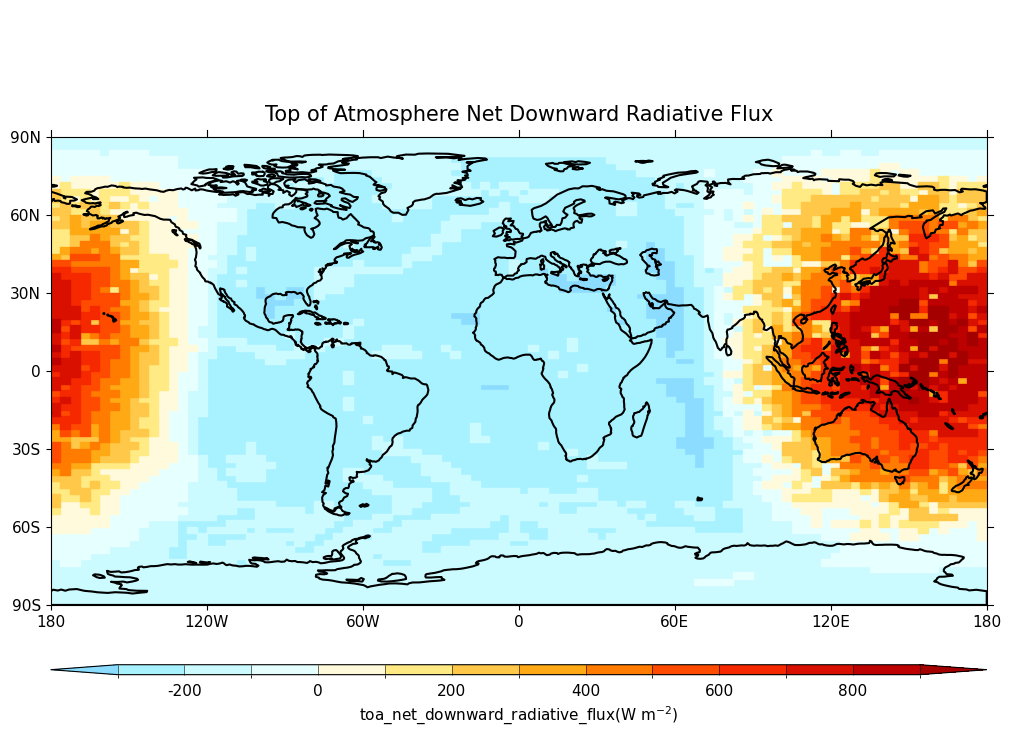

In [6]:
# plot the AOD
# error with using blockfill_fast, so use blockfill
cfp.con(toa, blockfill=True, lines=False, title='Top of Atmosphere Net Downward Radiative Flux')

In [7]:
# save the AOD field in NetCDF format
cf.write(toa, '/home/vagrant/cf_Task064_TOA.nc', fmt='NETCDF4')